Real-world example
HEP-2 cells BAM file of CAGE data from FANTOM5

This notebook requires conda env bio

In [ ]:
!conda activate bio

In [ ]:
# download libraries
# !pip install genomicranges pysam pandas pyranges

In [ ]:
#!pip install pyfaidx

In [ ]:
import pysam
import pandas as pd
from genomicranges import GenomicRanges
from iranges import IRanges
from biocframe import BiocFrame
import pyranges as pr
import requests

In [ ]:
import requests
import shutil

# Define the URL of the BAM file
url = "https://fantom.gsc.riken.jp/5/datafiles/reprocessed/hg38_latest/basic/human.cell_line.hCAGE/Hep-2%2520cells%2520mock%2520treated%252c%2520biol_rep3.CNhs13501.11900-125F1.hg38.nobarcode.bam"


In [ ]:
# # Define the local filename to save the file as
# local_filename = "/Users/jamessacco/dev/CRISPRiaDesign/FANTOM5_bam/Hep-2_cells_mock_treated.bam"

# # Stream download and save the file locally
# with requests.get(url, stream=True) as r:
#     with open(local_filename, 'wb') as f:
#         shutil.copyfileobj(r.raw, f)

# print(f"Downloaded {local_filename}")

In [ ]:
# # Define the URL of the BAM index file
# bai_url = "https://fantom.gsc.riken.jp/5/datafiles/reprocessed/hg38_latest/basic/human.cell_line.hCAGE/Hep-2%2520cells%2520mock%2520treated%252c%2520biol_rep3.CNhs13501.11900-125F1.hg38.nobarcode.bam.bai"

# # Define the local filename to save the index file as
# local_bai_filename = "/Users/jamessacco/dev/CRISPRiaDesign/FANTOM5_bam/Hep-2_cells_mock_treated.bam.bai"

# # Stream download and save the index file locally
# with requests.get(bai_url, stream=True) as r:
#     with open(local_bai_filename, 'wb') as f:
#         shutil.copyfileobj(r.raw, f)

# print(f"Downloaded {local_bai_filename}")


In [83]:
# Define the path to your BAM file
bam_file_path = "FANTOM5_bam/Hep-2_cells_mock_treated.bam"

# Open the BAM file using PySAM
bam = pysam.AlignmentFile(bam_file_path, "rb")

# Extract reads and create a DataFrame for TSSs
tss_data = []
for read in bam.fetch():
    if not read.is_unmapped:
        tss_data.append({
            "seqnames": read.reference_name,
            "start": read.reference_start,
            "end": read.reference_end,
            "strand": "+" if not read.is_reverse else "-",
            "score": read.mapping_quality
        })

bam.close()

KeyboardInterrupt: 

In [ ]:
# Convert to DataFrame
df_tss = pd.DataFrame(tss_data)
print(df_tss.head())

  seqnames  start    end strand  score
0     chr1  10072  10114      +      1
1     chr1  10159  10186      -      6
2     chr1  10620  10646      +      1
3     chr1  10828  10851      +      2
4     chr1  10828  10850      +      1


In [ ]:
# Rename columns 'start' to 'starts' and 'end' to 'ends'
df_tss.rename(columns={'start': 'starts', 'end': 'ends'}, inplace=True)


In [ ]:

# Display the updated DataFrame
print(df_tss.head())


  seqnames  starts   ends strand  score
0     chr1   10072  10114      +      1
1     chr1   10159  10186      -      6
2     chr1   10620  10646      +      1
3     chr1   10828  10851      +      2
4     chr1   10828  10850      +      1


In [ ]:

# Display Quality Score of CAGE reads
print(df_tss.score.value_counts())

score
40    2430514
2     2002555
3     1958302
4     1205378
1      985903
5      850747
6      654041
7      525066
8      424776
9      355360
10     308265
11     275264
12     238129
13     199199
14     181158
15     176699
16     150626
17     136364
18     122867
19     103971
20      92624
21      86991
22      81924
23      78155
24      73814
25      73741
26      71756
28      66867
27      66126
29      62270
30      60161
32      58455
31      56505
35      55804
34      54114
33      52635
39      50167
38      48284
37      47370
36      46995
0       29288
Name: count, dtype: int64


In [ ]:
# Filter for chromosome 20
chr20_tss = df_tss[df_tss['seqnames'] == 'chr20']
print(chr20_tss.head())

         seqnames  starts   ends strand  score
12463238    chr20   60021  60044      -      1
12463239    chr20   60130  60166      -      6
12463240    chr20   60687  60709      +     20
12463241    chr20   61499  61535      +      2
12463242    chr20   61666  61697      +      4


In [ ]:
#!wget -P ref/ https://ftp.ensembl.org/pub/release-109/gtf/homo_sapiens/Homo_sapiens.GRCh38.109.chr.gtf.gz 

In [ ]:
#!gunzip -k ref/Homo_sapiens.GRCh38.109.chr.gtf.gz

In [ ]:
# Load GTF file (assuming it's already downloaded and contains chromosome 20 annotations)
gtf = pr.read_gtf("ref/Homo_sapiens.GRCh38.109.chr.gtf")


In [ ]:
# Filter GTF for protein-coding transcripts on chromosome 20
gtf_chr20 = gtf[gtf.Chromosome == '20']

In [ ]:
print(gtf_chr20.head())

+--------------+------------+------------+-----------+-----------+-------+
|   Chromosome | Source     | Feature    |     Start |       End | +21   |
|   (category) | (object)   | (object)   |   (int64) |   (int64) | ...   |
|--------------+------------+------------+-----------+-----------+-------|
|           20 | havana     | gene       |   6446722 |   6528459 | ...   |
|           20 | havana     | transcript |   6446722 |   6528459 | ...   |
|           20 | havana     | exon       |   6446722 |   6446823 | ...   |
|           20 | havana     | exon       |   6473538 |   6473655 | ...   |
|           20 | havana     | exon       |   6527193 |   6528459 | ...   |
|           20 | havana     | gene       |   8248703 |   8256918 | ...   |
|           20 | havana     | transcript |   8248703 |   8249742 | ...   |
|           20 | havana     | exon       |   8248703 |   8248790 | ...   |
+--------------+------------+------------+-----------+-----------+-------+
Stranded PyRanges object 

Annotate TSSs with Closest Transcripts
Use pyranges to find overlaps or nearest features between your TSSs and the GTF annotations.

In [ ]:
# Rename columns 'start' to 'starts' and 'end' to 'ends'
chr20_tss.rename(columns={'seqnames': 'Chromosome', 'starts': 'Start', 'ends': 'End'}, inplace=True)

/var/folders/kv/f7hcb8_55h570k3pl9dsnwzc0000gn/T/ipykernel_4372/1128778547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr20_tss.rename(columns={'seqnames': 'Chromosome', 'starts': 'Start', 'ends': 'End'}, inplace=True)


In [ ]:
chr20_tss.head()

,Chromosome,Start,End,strand,score
12463238,chr20,60021,60044,-,1
12463239,chr20,60130,60166,-,6
12463240,chr20,60687,60709,+,20
12463241,chr20,61499,61535,+,2
12463242,chr20,61666,61697,+,4


In [ ]:
# Create PyRanges object for TSS data
tss_ranges = pr.PyRanges(chr20_tss)


In [ ]:
# Remove 'chr' prefix from Chromosome column in tss_ranges
tss_ranges.Chromosome = tss_ranges.Chromosome.str.replace('^chr', '', regex=True)

# Verify the change
print(tss_ranges)

+--------------+-----------+-----------+------------+-----------+
| Chromosome   | Start     | End       | strand     | score     |
| (category)   | (int64)   | (int64)   | (object)   | (int64)   |
|--------------+-----------+-----------+------------+-----------|
| 20           | 60021     | 60044     | -          | 1         |
| 20           | 60130     | 60166     | -          | 6         |
| 20           | 60687     | 60709     | +          | 20        |
| 20           | 61499     | 61535     | +          | 2         |
| ...          | ...       | ...       | ...        | ...       |
| 20           | 64331189  | 64331210  | +          | 1         |
| 20           | 64331353  | 64331381  | +          | 2         |
| 20           | 64333032  | 64333056  | +          | 2         |
| 20           | 64333064  | 64333087  | +          | 4         |
+--------------+-----------+-----------+------------+-----------+
Unstranded PyRanges object has 384,610 rows and 5 columns from 1 chromosomes

In [ ]:
# Display the PyRanges object
print(gtf_chr20)

+--------------+------------+------------+-----------+-----------+-------+
| Chromosome   | Source     | Feature    | Start     | End       | +21   |
| (category)   | (object)   | (object)   | (int64)   | (int64)   | ...   |
|--------------+------------+------------+-----------+-----------+-------|
| 20           | havana     | gene       | 6446722   | 6528459   | ...   |
| 20           | havana     | transcript | 6446722   | 6528459   | ...   |
| 20           | havana     | exon       | 6446722   | 6446823   | ...   |
| 20           | havana     | exon       | 6473538   | 6473655   | ...   |
| ...          | ...        | ...        | ...       | ...       | ...   |
| 20           | havana     | CDS        | 3689599   | 3689702   | ...   |
| 20           | havana     | exon       | 3688510   | 3688619   | ...   |
| 20           | havana     | CDS        | 3688513   | 3688619   | ...   |
| 20           | havana     | stop_codon | 3688510   | 3688513   | ...   |
+--------------+---------

In [76]:
# Check if the DataFrames are not empty
print("TSS DataFrame is empty:", df_tss.empty)
print("GTF DataFrame is empty:", gtf_chr20.empty)

TSS DataFrame is empty: False
GTF DataFrame is empty: False


In [ ]:
# Assuming gtf_chr20 is already defined and correctly formatted
# Find nearest transcripts for each TSS
nearest_transcripts = tss_ranges.nearest(gtf_chr20, overlap=True, strandedness = None, apply_strand_suffix=False, how=None, suffix="_annotation")

# Display annotated TSSs
print(nearest_transcripts)

+--------------+-----------+-----------+------------+-----------+-------+
| Chromosome   | Start     | End       | strand     | score     | +26   |
| (category)   | (int64)   | (int64)   | (object)   | (int64)   | ...   |
|--------------+-----------+-----------+------------+-----------+-------|
| 20           | 88647     | 88673     | +          | 2         | ...   |
| 20           | 88753     | 88776     | +          | 3         | ...   |
| 20           | 88984     | 89010     | +          | 13        | ...   |
| 20           | 89600     | 89625     | +          | 4         | ...   |
| ...          | ...       | ...       | ...        | ...       | ...   |
| 20           | 64331189  | 64331210  | +          | 1         | ...   |
| 20           | 64331353  | 64331381  | +          | 2         | ...   |
| 20           | 64333032  | 64333056  | +          | 2         | ...   |
| 20           | 64333064  | 64333087  | +          | 4         | ...   |
+--------------+-----------+----------

In [ ]:
print(nearest_transcripts.columns)

Index(['Chromosome', 'Start', 'End', 'strand', 'score', 'Source', 'Feature',
       'Start_annotation', 'End_annotation', 'Score', 'Strand', 'Frame',
       'gene_id', 'gene_version', 'gene_name', 'gene_source', 'gene_biotype',
       'transcript_id', 'transcript_version', 'transcript_name',
       'transcript_source', 'transcript_biotype', 'tag', 'ccds_id',
       'exon_number', 'exon_id', 'exon_version', 'protein_id',
       'protein_version', 'transcript_support_level', 'Distance'],
      dtype='object')


In [ ]:
print(nearest_transcripts.Distance.value_counts())

Distance
0        282277
15          213
123         190
122         189
12          184
          ...  
99974         1
99935         1
99739         1
99419         1
6164          1
Name: count, Length: 44962, dtype: int64


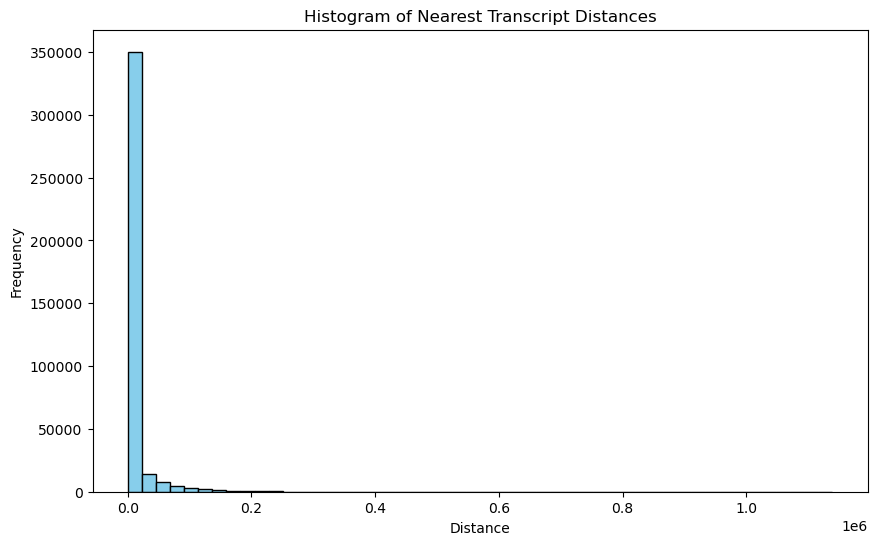

In [84]:
import matplotlib.pyplot as plt

# Convert PyRanges object to DataFrame
df_nearest = nearest_transcripts.df

# Check if 'Distance' column exists
if 'Distance' in df_nearest.columns:
    # Plot histogram of the Distance column
    plt.figure(figsize=(10, 6))
    plt.hist(df_nearest['Distance'], bins=50, color='skyblue', edgecolor='black')
    plt.title('Histogram of Nearest Transcript Distances')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')

    # Save the plot as a PNG file
    plt.savefig('plots/nearest_transcript_distances.png')

    # Show the plot (optional)
    plt.show()
else:
    print("The 'Distance' column does not exist in the nearest_transcripts DataFrame.")

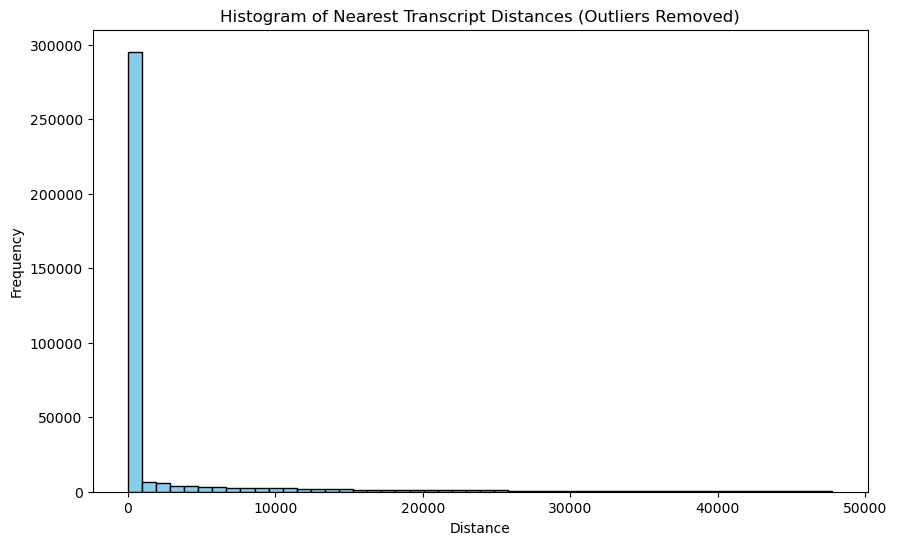

In [85]:
# Assume df_nearest is your DataFrame with a 'Distance' column
df_nearest = nearest_transcripts.df

# Calculate the 95th percentile of the Distance column
distance_95th_percentile = df_nearest['Distance'].quantile(0.95)

# Remove entries in the Distance column that exceed the 95th percentile
filtered_df_nearest = df_nearest[df_nearest['Distance'] <= distance_95th_percentile]

# Plot histogram of the filtered Distance column
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_nearest['Distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Nearest Transcript Distances (Outliers Removed)')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('plots/nearest_transcript_distances_filtered.png')

# Show the plot
plt.show()

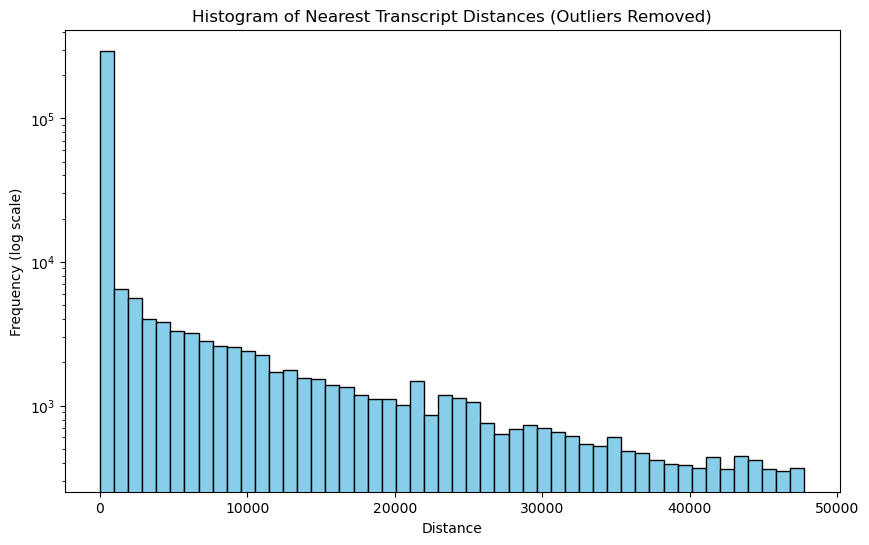

In [86]:
# Assume df_nearest is your DataFrame with a 'Distance' column
df_nearest = nearest_transcripts.df

# Calculate the 95th percentile of the Distance column
distance_95th_percentile = df_nearest['Distance'].quantile(0.95)

# Remove entries in the Distance column that exceed the 95th percentile
filtered_df_nearest = df_nearest[df_nearest['Distance'] <= distance_95th_percentile]

# Plot histogram of the filtered Distance column with a log scale
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_nearest['Distance'], bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Histogram of Nearest Transcript Distances (Outliers Removed)')
plt.xlabel('Distance')
plt.ylabel('Frequency (log scale)')

# Save the plot as a PNG file
plt.savefig('plots/nearest_transcript_distances_filtered_log.png')

# Show the plot
plt.show()